<a href="https://colab.research.google.com/github/igors96/Logistic_Regression_Breast_Cancer/blob/main/reg_log_deodorant_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', 64)
pd.set_option('display.max_rows', 64)
arquivo = pd.read_csv('/content/Data_train_reduced.csv')

In [2]:
arquivo.head()

,Respondent.ID,Product.ID,Product,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,3800,121,Deodorant B,1,4,1,4,2,5,4,2,3,5,5,5,4,5,3,1,5,1,2,4,5,4,5,1,1,4,1,4,1,1,0,0.0,0,0,NaN,1.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,2,1,1,2,1,7,7,4,1,4,3,1,1,0.0,0,3
1,3801,121,Deodorant B,0,5,1,4,4,2,2,1,3,2,4,4,4,3,1,1,3,4,4,5,3,3,4,2,2,5,4,4,4,4,0,0.0,0,1,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,3,5,3,3,3,8,6,4,1,4,3,1,1,0.0,0,4
2,3802,121,Deodorant B,0,6,1,3,2,5,2,4,2,4,3,5,4,4,4,3,1,2,1,4,2,4,3,2,5,4,4,3,4,3,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,1,3,3,2,5,7,4,1,3,5,1,1,0.0,0,2
3,3803,121,Deodorant B,1,4,0,4,5,5,4,3,5,2,5,3,5,5,5,1,4,3,3,5,5,4,2,5,3,3,5,4,4,3,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,4,1,3,6,8,1,4,1,4,9,1,3,0.0,0,3
4,3804,121,Deodorant B,1,4,1,2,1,3,1,1,3,3,5,3,5,5,5,1,4,4,2,3,5,1,2,4,2,3,1,5,3,2,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,3,3,2,5,4,4,4,1,3,5,1,2,0.0,0,3


In [3]:
arquivo.shape

(2500, 64)

In [4]:
arquivo.dtypes

Respondent.ID                                                int64
Product.ID                                                   int64
Product                                                     object
Instant.Liking                                               int64
q1_1.personal.opinion.of.this.Deodorant                      int64
q2_all.words                                                 int64
q3_1.strength.of.the.Deodorant                               int64
q4_1.artificial.chemical                                     int64
q4_2.attractive                                              int64
q4_3.bold                                                    int64
q4_4.boring                                                  int64
q4_5.casual                                                  int64
q4_6.cheap                                                   int64
q4_7.clean                                                   int64
q4_8.easy.to.wear                                            i

In [5]:
faltantes = arquivo.isnull().sum()
faltantes_percentual = (faltantes/len(arquivo['Product.ID'])) * 100
print(faltantes_percentual)

Respondent.ID                                               0.0
Product.ID                                                  0.0
Product                                                     0.0
Instant.Liking                                              0.0
q1_1.personal.opinion.of.this.Deodorant                     0.0
q2_all.words                                                0.0
q3_1.strength.of.the.Deodorant                              0.0
q4_1.artificial.chemical                                    0.0
q4_2.attractive                                             0.0
q4_3.bold                                                   0.0
q4_4.boring                                                 0.0
q4_5.casual                                                 0.0
q4_6.cheap                                                  0.0
q4_7.clean                                                  0.0
q4_8.easy.to.wear                                           0.0
q4_9.elegant                            

In [6]:
arquivo.drop(['q8.2', 'q8.8', 'q8.9', 'q8.10', 'q8.17', 'q8.18', 'q8.20', 'Respondent.ID', 'Product', 'q1_1.personal.opinion.of.this.Deodorant'], axis=1, inplace = True)

In [7]:
arquivo['q8.12'].fillna(arquivo['q8.12'].median(), inplace = True)
arquivo['q8.7'].fillna(arquivo['q8.7'].median(), inplace = True)

In [8]:
faltantes = arquivo.isnull().sum()
faltantes_percentual = (faltantes/len(arquivo['Product.ID'])) * 100
print(faltantes_percentual)

Product.ID                                                 0.0
Instant.Liking                                             0.0
q2_all.words                                               0.0
q3_1.strength.of.the.Deodorant                             0.0
q4_1.artificial.chemical                                   0.0
q4_2.attractive                                            0.0
q4_3.bold                                                  0.0
q4_4.boring                                                0.0
q4_5.casual                                                0.0
q4_6.cheap                                                 0.0
q4_7.clean                                                 0.0
q4_8.easy.to.wear                                          0.0
q4_9.elegant                                               0.0
q4_10.feminine                                             0.0
q4_11.for.someone.like.me                                  0.0
q4_12.heavy                                            

In [9]:
x = arquivo.drop('Instant.Liking', axis = 1)
y = arquivo['Instant.Liking']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 14)

In [11]:
kfold = KFold(n_splits = 5)
stratifiedkfold = StratifiedKFold(n_splits = 5)
modelo = LogisticRegression(max_iter = 1500)
resultado1 = cross_val_score(modelo,x,y,cv = kfold)
resultado2 = cross_val_score(modelo,x,y,cv = stratifiedkfold)
print(resultado1.mean())
print(resultado2.mean())

0.7484
0.7504000000000001


In [12]:
#Ajuste fino de parâmetros
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Definindo os valores que serão testados em LogisticRegression
valores_C = np.array([0.01,0.1,0.5,1,2,3,5,10,20,50,100])
regularizacao = ['l1','l2']
valores_grid = {'C': valores_C, 'penalty': regularizacao}

modelo1 = LogisticRegression(max_iter = 1500)

grid_regressao_logistica = GridSearchCV(estimator = modelo1,param_grid = valores_grid,cv = 5)
grid_regressao_logistica.fit(x,y)

print("Melhor acurácia:", grid_regressao_logistica.best_score_)
print("Parâmetro C:", grid_regressao_logistica.best_estimator_.C)
print("Regularização:", grid_regressao_logistica.best_estimator_.penalty)

Melhor acurácia: 0.7528
Parâmetro C: 0.01
Regularização: l2


In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns',30)
dados = load_breast_cancer()
x1 = pd.DataFrame(dados.data, columns = [dados.feature_names])
y1 = pd.Series(dados.target) 

In [14]:
x1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y1.head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [16]:
#Ajuste fino de parâmetros
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Definindo os valores que serão testados em LogisticRegression
valores_C1 = np.array([0.01,0.1,0.5,1,2,3,5,10,20,50,100])
regularizacao1 = ['l1','l2']
valores_grid1 = {'C': valores_C1, 'penalty': regularizacao1}

modelo2 = LogisticRegression(max_iter = 500)

grid_regressao_logistica1 = GridSearchCV(estimator = modelo2,param_grid = valores_grid1,cv = 5)
grid_regressao_logistica1.fit(x1,y1)

print("Melhor acurácia:", grid_regressao_logistica1.best_score_)
print("Parâmetro C:", grid_regressao_logistica1.best_estimator_.C)
print("Regularização:", grid_regressao_logistica1.best_estimator_.penalty)

Melhor acurácia: 0.9543238627542306
Parâmetro C: 5.0
Regularização: l2


In [17]:
#Confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y1, test_size = 0.3, random_state = 9)

modelo_tts = LogisticRegression(max_iter = 300, C = 0.01, penalty = 'l2')
modelo_tts.fit(x_treino, y_treino)

resultado_tts = modelo_tts.score(x_teste, y_teste)
print("Acurácia:", resultado_tts)

Acurácia: 0.935672514619883


In [18]:
predicao = modelo_tts.predict(x_teste)
predicao

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [19]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_teste, predicao)
print(matriz)

[[ 54   8]
 [  3 106]]


In [20]:
predicoes = modelo_tts.predict_proba(x_teste)
predicoes

array([[1.15929630e-01, 8.84070370e-01],
       [5.10273727e-01, 4.89726273e-01],
       [9.99999993e-01, 7.36838325e-09],
       [1.46246908e-02, 9.85375309e-01],
       [4.81309204e-04, 9.99518691e-01],
       [9.99999989e-01, 1.05131884e-08],
       [9.99999998e-01, 1.92579361e-09],
       [9.99980836e-01, 1.91639005e-05],
       [4.49055486e-03, 9.95509445e-01],
       [9.99760709e-01, 2.39290855e-04],
       [9.99999748e-01, 2.52037389e-07],
       [2.51582116e-03, 9.97484179e-01],
       [1.09112260e-03, 9.98908877e-01],
       [3.23068803e-03, 9.96769312e-01],
       [9.97063470e-01, 2.93653010e-03],
       [1.56330239e-01, 8.43669761e-01],
       [1.47927765e-04, 9.99852072e-01],
       [3.71253266e-02, 9.62874673e-01],
       [4.55561714e-04, 9.99544438e-01],
       [8.11956038e-04, 9.99188044e-01],
       [1.00000000e+00, 6.51284542e-19],
       [5.52629526e-04, 9.99447370e-01],
       [8.72930927e-03, 9.91270691e-01],
       [9.99987456e-01, 1.25438123e-05],
       [1.799799

In [21]:
probs = predicoes[:,1]

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_teste, probs)

In [23]:
print("TPR:", tpr)
print("FPR:", fpr)
print("Thresholds:", thresholds)

TPR: [0.         0.00917431 0.87155963 0.87155963 0.90825688 0.90825688
 0.96330275 0.96330275 0.97247706 0.97247706 0.98165138 0.98165138
 1.         1.        ]
FPR: [0.         0.         0.         0.01612903 0.01612903 0.06451613
 0.06451613 0.11290323 0.11290323 0.14516129 0.14516129 0.17741935
 0.17741935 1.        ]
Thresholds: [1.99999429e+00 9.99994286e-01 9.51462484e-01 9.37553451e-01
 8.85916626e-01 8.78430157e-01 7.41406392e-01 5.16322472e-01
 5.14476635e-01 4.89726273e-01 4.57670438e-01 3.22511596e-01
 2.99978923e-01 1.41887951e-24]


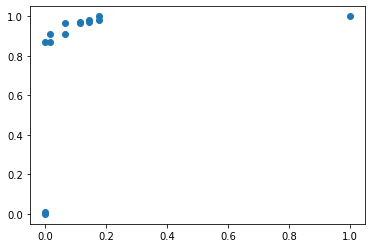

In [24]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_teste, probs))

0.9902337969813554
